In [1]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [2]:
data = pd.read_csv('Housing.csv')
area = data['area']
bed = data["bedrooms"]
bath = data["bathrooms"]
story = data["stories"]

feature=[]

price = data['price']
for i in range (len(area)):
    tmp=[]
    tmp.append(area[i]/1000)
    tmp.append(bed[i])
    tmp.append(bath[i])
    tmp.append(story[i])
    feature.append(tmp)

price_scale = list(map(lambda x: (x)/100000, price))

X_train = np.array(feature)
y_train = np.array(price_scale)

print(X_train)
print(y_train)
    

[[7.42 4.   2.   3.  ]
 [8.96 4.   4.   4.  ]
 [9.96 3.   2.   2.  ]
 ...
 [3.62 2.   1.   1.  ]
 [2.91 3.   1.   1.  ]
 [3.85 3.   1.   2.  ]]
[133.   122.5  122.5  122.15 114.1  108.5  101.5  101.5   98.7   98.
  98.    96.81  93.1   92.4   92.4   91.    91.    89.6   88.9   88.55
  87.5   86.8   86.45  86.45  85.75  85.4   84.63  84.    84.    84.
  84.    84.    82.95  81.9   81.2   80.81  80.43  79.8   79.62  79.1
  78.75  78.4   77.    77.    75.6   75.6   75.25  74.9   74.55  74.2
  74.2   74.2   73.5   73.5   73.5   73.5   73.43  72.45  72.1   72.1
  71.4   70.7   70.7   70.35  70.    69.3   69.3   68.95  68.6   67.9
  67.9   67.55  67.2   66.85  66.5   66.5   66.5   66.5   66.5   66.5
  66.29  66.15  66.15  65.8   65.1   65.1   65.1   64.75  64.75  64.4
  64.4   64.19  64.05  63.    63.    63.    63.    63.    62.93  62.65
  62.3   62.3   61.95  61.95  61.95  61.6   61.6   61.25  61.08  60.9
  60.9   60.9   60.83  60.83  60.2   60.2   60.2   59.5   59.5   59.5
  59.5   59.5   

In [3]:
print(f"X Shape: {X_train.shape}")
print(X_train)
print("\n")
print(f"y Shape: {y_train.shape}")
print(y_train)

X Shape: (545, 4)
[[7.42 4.   2.   3.  ]
 [8.96 4.   4.   4.  ]
 [9.96 3.   2.   2.  ]
 ...
 [3.62 2.   1.   1.  ]
 [2.91 3.   1.   1.  ]
 [3.85 3.   1.   2.  ]]


y Shape: (545,)
[133.   122.5  122.5  122.15 114.1  108.5  101.5  101.5   98.7   98.
  98.    96.81  93.1   92.4   92.4   91.    91.    89.6   88.9   88.55
  87.5   86.8   86.45  86.45  85.75  85.4   84.63  84.    84.    84.
  84.    84.    82.95  81.9   81.2   80.81  80.43  79.8   79.62  79.1
  78.75  78.4   77.    77.    75.6   75.6   75.25  74.9   74.55  74.2
  74.2   74.2   73.5   73.5   73.5   73.5   73.43  72.45  72.1   72.1
  71.4   70.7   70.7   70.35  70.    69.3   69.3   68.95  68.6   67.9
  67.9   67.55  67.2   66.85  66.5   66.5   66.5   66.5   66.5   66.5
  66.29  66.15  66.15  65.8   65.1   65.1   65.1   64.75  64.75  64.4
  64.4   64.19  64.05  63.    63.    63.    63.    63.    62.93  62.65
  62.3   62.3   61.95  61.95  61.95  61.6   61.6   61.25  61.08  60.9
  60.9   60.9   60.83  60.83  60.2   60.2   60.2  

In [4]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p
    

In [5]:
# L regularization
# def compute_cost(X, y, w, b): 
#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           
#         cost = cost + (f_wb_i - y[i])**2       
#     cost = cost / (2 * m)                       
#     return cost

# L1 regularization
# def compute_cost(X, y, w, b): 
#     m = X.shape[0]
#     n=len(w)
#     cost = 0.0
#     reg_p = 0.1
#     norm = 0.0
#     for j in range(n):
#         norm = norm + abs(w[j])
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           
#         cost = cost + (f_wb_i - y[i])**2       
#     cost = (cost + (reg_p * norm)) / (2 * m)                       
#     return cost


# L2 regularization
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    n=len(w)
    cost = 0.0
    reg_p = 0.1
    norm = 0.0
    for j in range(n):
        norm = norm + ((w[j])**2)
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    cost = (cost + (reg_p * norm)) / (2 * m)                       
    return cost

In [6]:
# L regularization
# def compute_gradient(X, y, w, b): 
#     m,n = X.shape           
#     dj_dw = np.zeros((n,))
#     dj_db = 0.
#     for i in range(m):                             
#         err = (np.dot(X[i], w) + b) - y[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X[i, j]    
#         dj_db = dj_db + err                        
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m                                
#     return dj_db, dj_dw

# L1 regularization
# def compute_gradient(X, y, w, b): 
#     m,n = X.shape           
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     if sum(w)>0:
#         reg_p = 0.1
#     else:
#         reg_p = -0.1

#     for i in range(m):                             
#         err = (np.dot(X[i], w) + b) - y[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X[i, j]    
#         dj_db = dj_db + err                        
#     dj_dw = (dj_dw + reg_p) / m                                
#     dj_db = dj_db / m                                
#     return dj_db, dj_dw


# L2 regularization
def compute_gradient(X, y, w, b): 
    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    reg_p = 0.1
    

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = (dj_dw + (reg_p * sum(w)) ) / m                                
    dj_db = dj_db / m                                
    return dj_db, dj_dw

In [7]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [15]:
b_init = 0
w_init = np.array([ 0.0, 0.0, 0.0, 0.0])
print("w_init shape: ",w_init.shape )

w_init shape:  (4,)


In [12]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 30000
alpha = 1.0e-3
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost  1205.00   
Iteration 3000: Cost    84.62   
Iteration 6000: Cost    82.34   
Iteration 9000: Cost    81.61   
Iteration 12000: Cost    81.35   
Iteration 15000: Cost    81.25   
Iteration 18000: Cost    81.20   
Iteration 21000: Cost    81.18   
Iteration 24000: Cost    81.16   
Iteration 27000: Cost    81.15   
b,w found by gradient descent: -1.68,[ 3.76  1.75 11.86  5.31] 


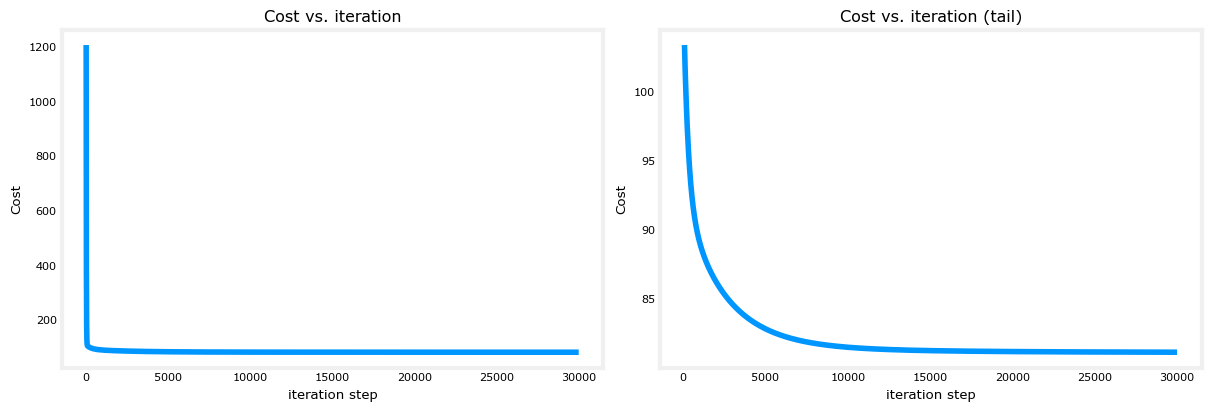

In [13]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [14]:
area=float(input("enter the area :"))
bed=float(input("enter the number of bed room :"))
bath=float(input("enter the number of bathroom :"))
story=float(input("enter the number of floor :"))
price = b_final + ((w_final[0]*1000*area) + (w_final[1]*bed) + (w_final[2]*bath) + (w_final[3]*story))
print(price)



enter the area : 6000
enter the number of bed room : 4
enter the number of bathroom : 3
enter the number of floor : 2


22583515.655932244
